# Figure 6

In [1]:
%run _define_model_class.ipynb
%run _define_plotting_class.ipynb

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# plotting
import cmocean as cm
import matplotlib.pyplot as plt
from plotting_tools.spatial_map import SpatialMap
from plotting_tools.time_series_diagram import TimeSeriesPlot
import cartopy.crs as ccrs
from matplotlib.ticker import AutoMinorLocator
import cartopy.feature as cfeature

# Warning: Using an implicitly registered datetime converter for a matplotlib plotting method
# The converter was registered by pandas on import. 
# Future versions of pandas will require you to explicitly register matplotlib converters
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Standard deviation scatter plots

## Decadal

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: 

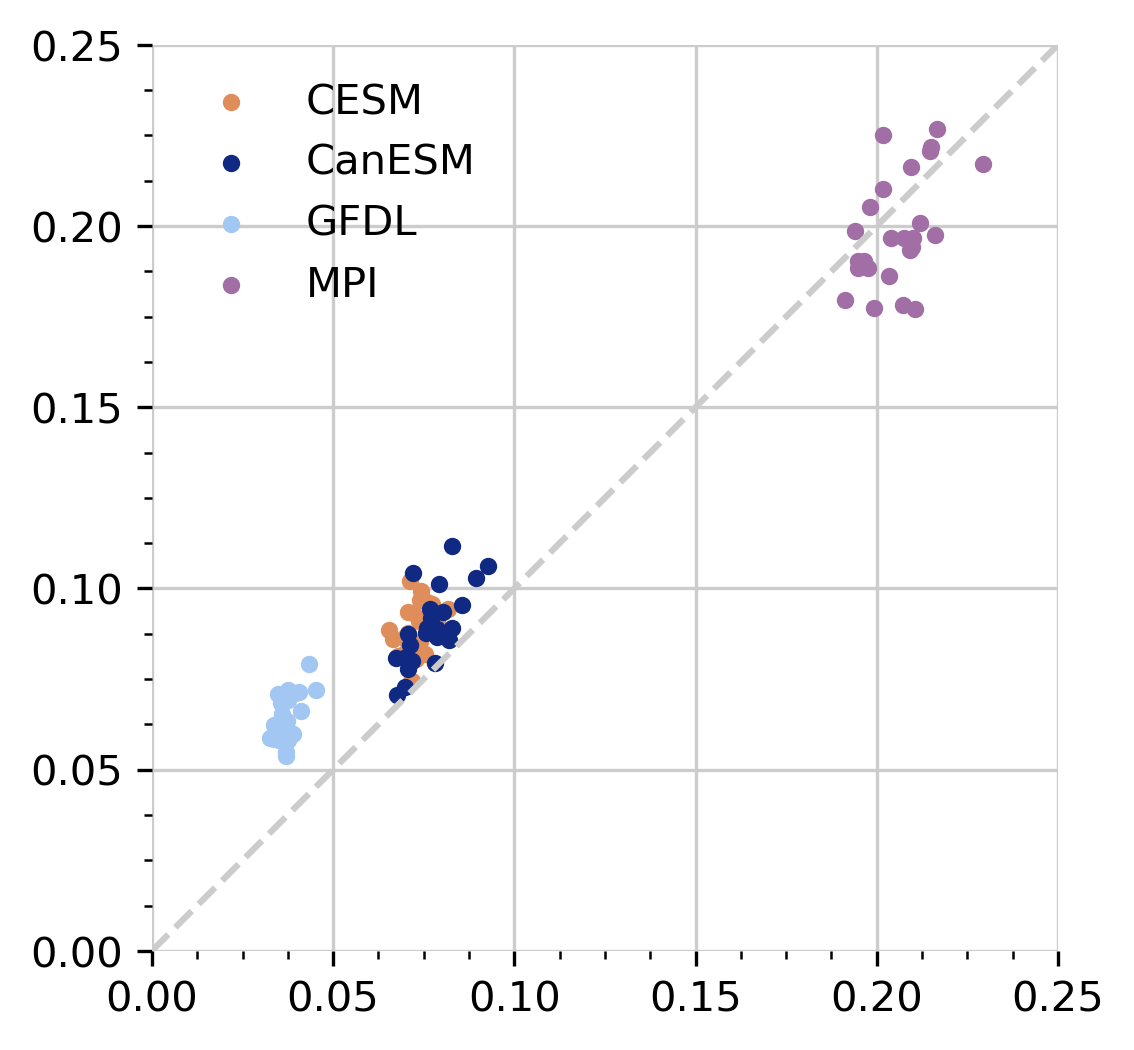

In [3]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# axis limits
ax_lims = [0, 0.25, 0.05]

# lats and stat
lats = [-90,-35]
stat = 'dec'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])
 
colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # plot scatter
    ax.scatter(sigmaM, sigmaR, s=10, label=model, c=colors[model])
    
# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('') # Reconstructed STD
ax.set_xlabel('') # Ensemble member STD

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
leg = ax.legend(frameon=False)

## Seasonal

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: 

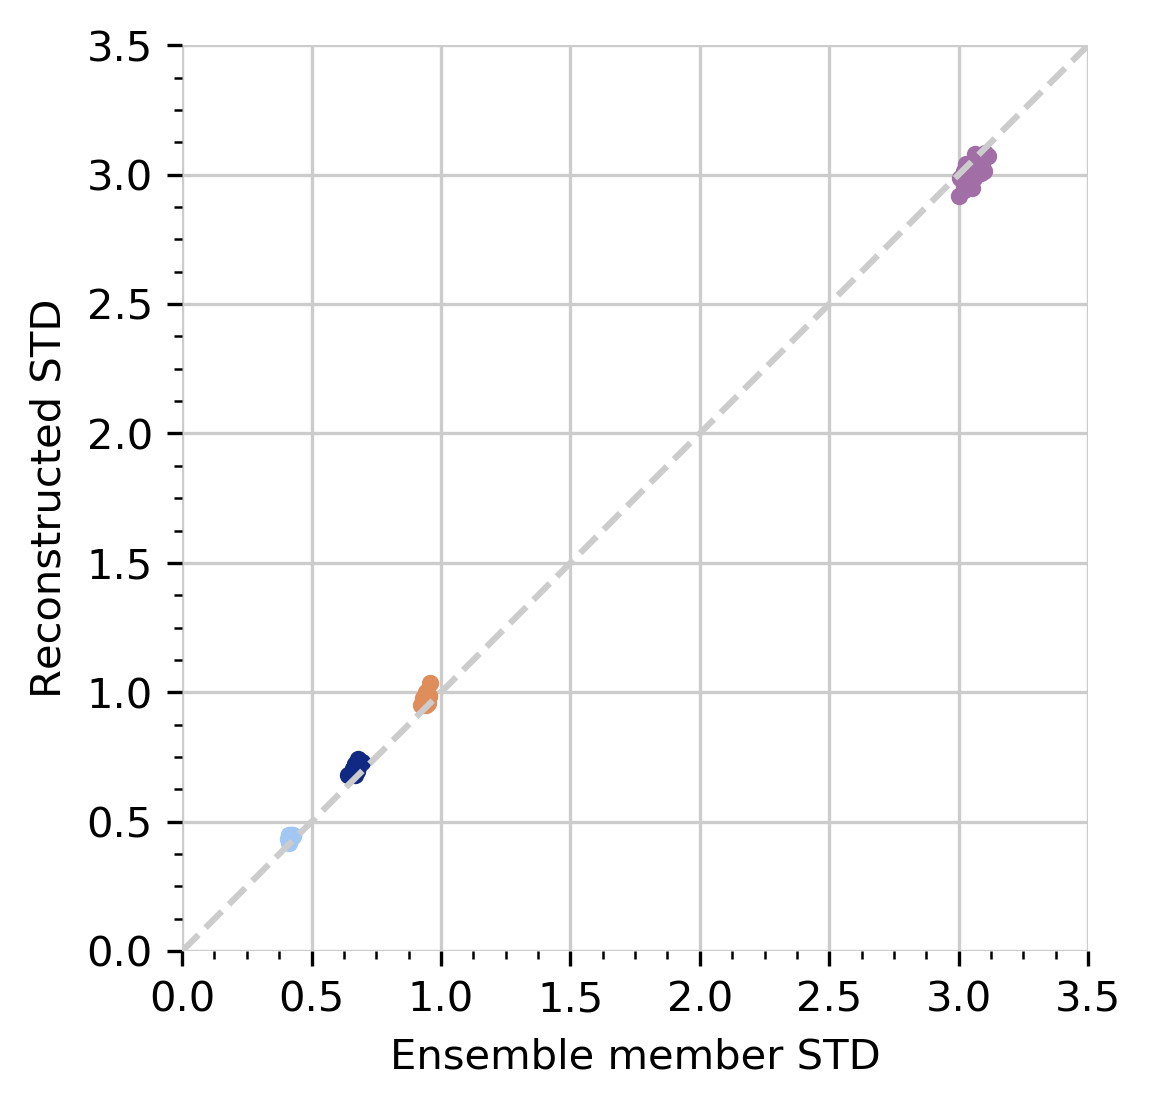

In [37]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

# axis limits
ax_lims = [0, 3.5, 0.5]

# lats and stat
lats = [-90,-35]
stat = 'seasonal'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # plot scatter
    ax.scatter(sigmaM, sigmaR, s=10, label=model, c=colors[model])
    
# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('Reconstructed STD')
ax.set_xlabel('Ensemble member STD')

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
#leg = ax.legend(frameon=False)

# statistics

## Over all models

In [38]:
import skill_metrics as sk

# choose latitudes
lats=[-90,-35]

# loop over times
for stat in ['dec', 'residual', 'seasonal']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # select latitutes
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1]))
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1]))    

    # mean correlation
    corr = sk.skill_metrics.correlation(sigmaM, sigmaR, dim='ensemble')
    mean_corr = corr.mean(['lon', 'lat']).values

    # mean percent error 
    percent_error = ((sigmaR - sigmaM)/sigmaM)*100
    mean_per_error = percent_error.mean().values

    # mean aae
    aae = sk.skill_metrics.avg_abs_error(sigmaM, sigmaR, dim='ensemble')
    mean_aae = aae.mean().values

    # mean bias
    bias = sk.skill_metrics.avg_error(sigmaM, sigmaR, dim='ensemble')
    mean_bias = bias.mean().values

    print(f'{stat} bias={mean_bias:0.3f}  r={mean_corr:0.3f}  %error={mean_per_error:0.3f}  AAE={mean_aae:0.3f}')

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=0.012  r=0.775  %error=39.213  AAE=0.037


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


residual bias=-0.023  r=0.975  %error=3.681  AAE=0.097


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.008  r=0.976  %error=7.236  AAE=0.157


## By model

In [22]:
import skill_metrics as sk

#stat='dec'

# choose latitudes
lats=[-90,-35]

# loop over times
for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    print(f'')
    print(f'========== {model} ==========')
    for stat in ['seasonal', 'residual', 'dec']:
        # load data
        ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                               concat_dim='ensemble', 
                               combine='nested')

        ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                               concat_dim='ensemble', 
                               combine='nested')

        # calcualte standard deviation
        ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
        ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

        # select latitutes
        sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1]))
        sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1]))    

        # mean correlation
        corr = sk.skill_metrics.correlation(sigmaM, sigmaR, dim='ensemble')
        mean_corr = corr.mean(['lon', 'lat']).values
        
        # mean percent error 
        percent_error = ((sigmaR - sigmaM)/sigmaM)*100
        mean_per_error = percent_error.mean().values
        
        # mean aae
        aae = sk.skill_metrics.avg_abs_error(sigmaM, sigmaR, dim='ensemble')
        mean_aae = aae.mean().values
    
        # mean bias
        bias = sk.skill_metrics.avg_error(sigmaM, sigmaR, dim='ensemble')
        mean_bias = bias.mean().values

        print(f'{stat} bias={mean_bias:0.3f}  r={mean_corr:0.3f}  %error={mean_per_error:0.3f}  AAE={mean_aae:0.3f}')


========== CESM ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.035  r=0.373  %error=12.432  AAE=0.161


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


residual bias=-0.025  r=0.502  %error=0.537  AAE=0.088


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=0.016  r=0.197  %error=40.725  AAE=0.033

========== CanESM ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.028  r=0.557  %error=6.747  AAE=0.119


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


residual bias=0.026  r=0.597  %error=7.719  AAE=0.083


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=0.011  r=0.469  %error=26.450  AAE=0.028

========== GFDL ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.021  r=0.372  %error=9.666  AAE=0.089


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


residual bias=0.036  r=0.454  %error=13.307  AAE=0.064


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=0.027  r=0.354  %error=84.422  AAE=0.031

========== MPI ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=-0.048  r=0.609  %error=0.080  AAE=0.260


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


residual bias=-0.128  r=0.676  %error=-6.737  AAE=0.152


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=-0.007  r=0.390  %error=4.837  AAE=0.056


In [41]:
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'
ds_stats = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

In [45]:
ds_stats['std-star_seasonal'].sel(lat=slice(-90,-35)).mean().values

array(0.07236126)

# Idealized sampling

# Decadal

In [40]:
# lats and stat
lats = [-90,-35]
stat = 'dec'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])
 
colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

#for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
model = 'CanESM'
# load data
ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

# calcualte standard deviation
ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

# mean STD within southern ocean
sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [ ]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# axis limits
ax_lims = [0, 0.25, 0.05]

# lats and stat
lats = [-90,-35]
stat = 'dec'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])
 
colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

#for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
model = 'CanESM'
# load data
ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

# calcualte standard deviation
ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

# mean STD within southern ocean
sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values

# plot scatter
ax.scatter(sigmaM, sigmaR, s=10, label=model, c=colors[model])

# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('')
ax.set_xlabel('') #Ensemble member STD

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off',
                labelleft='off') # turn off bottom ticks

#ax.tick_params(labelleft='off')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
#ax.tick_params(axis='y', which='both', length=0) # removes x ticks
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')
ax.set_yticklabels([])


# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
#leg = ax.legend(frameon=False)

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: 

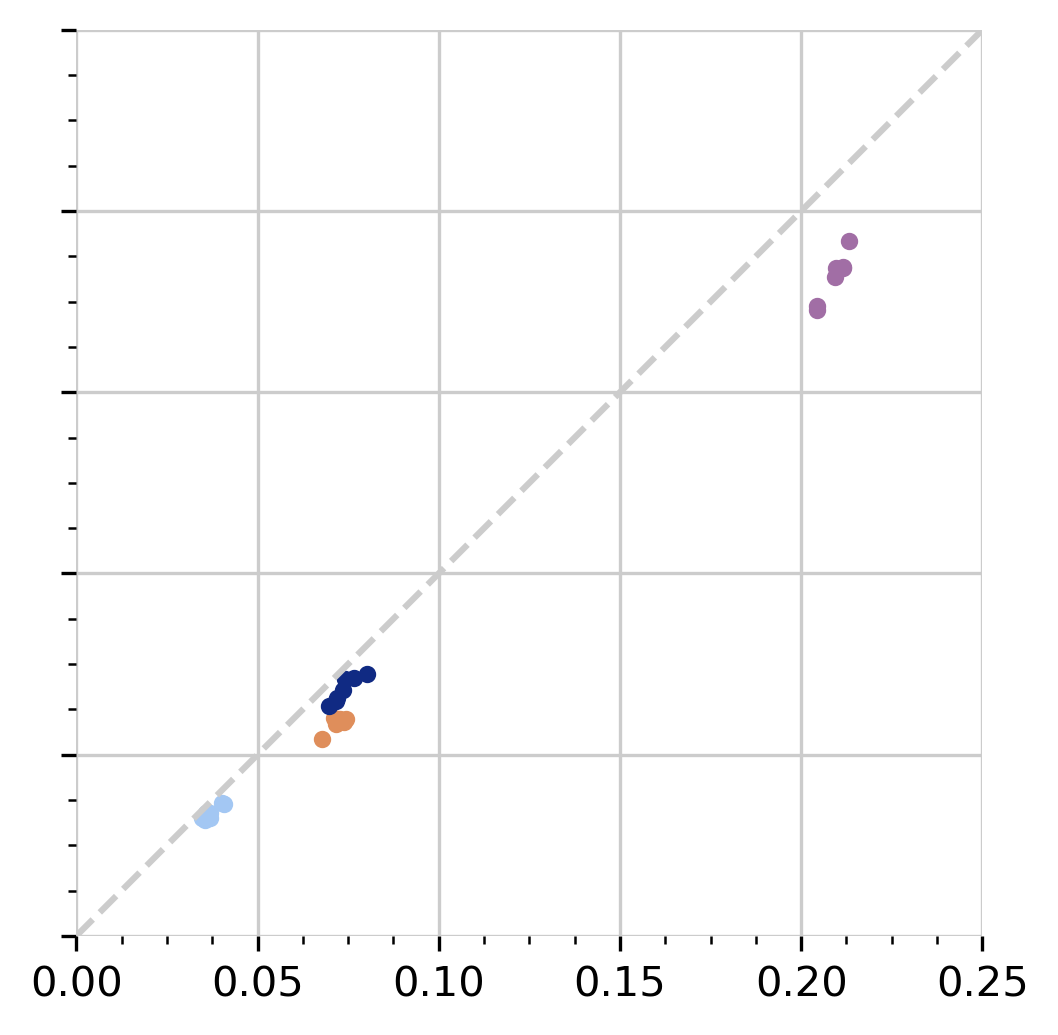

In [3]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# axis limits
ax_lims = [0, 0.25, 0.05]

# lats and stat
lats = [-90,-35]
stat = 'dec'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])
 
colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # plot scatter
    ax.scatter(sigmaM, sigmaR, s=10, label=model, c=colors[model])
    
# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('')
ax.set_xlabel('') #Ensemble member STD

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off',
                labelleft='off') # turn off bottom ticks

#ax.tick_params(labelleft='off')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
#ax.tick_params(axis='y', which='both', length=0) # removes x ticks
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')
ax.set_yticklabels([])


# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
#leg = ax.legend(frameon=False)

# Seasonal

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: 

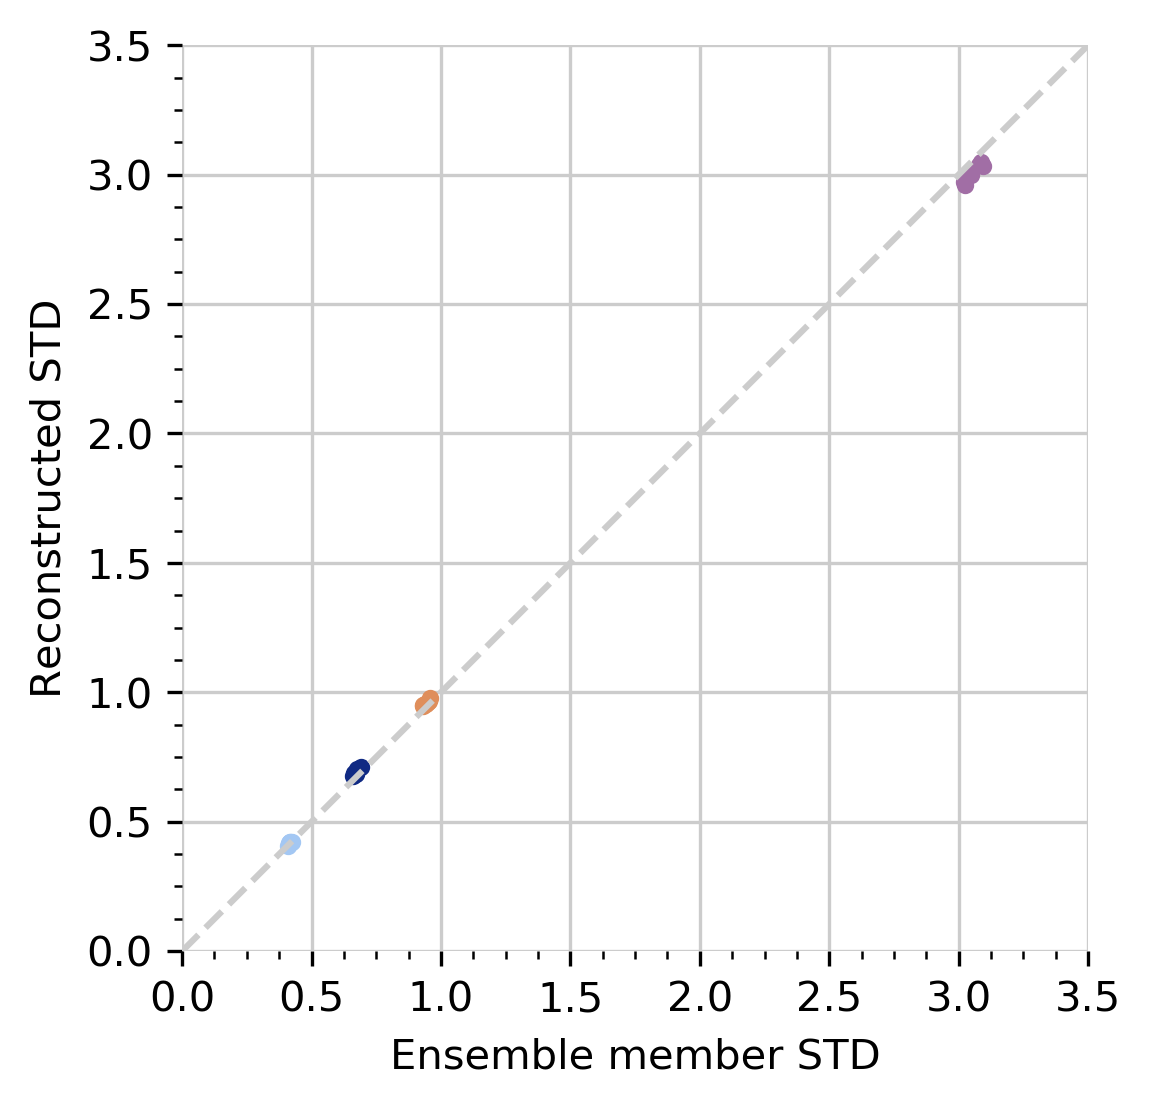

In [48]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

# axis limits
ax_lims = [0, 3.5, 0.5]

# lats and stat
lats = [-90,-35]
stat = 'seasonal'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # plot scatter
    ax.scatter(sigmaM, sigmaR, s=10, label=model, c=colors[model])
    
# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('Reconstructed STD')
ax.set_xlabel('Ensemble member STD')

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
#leg = ax.legend(frameon=False)

# Statistics by model

In [7]:
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

stat='dec'

# choose latitudes
lats=[-90,-35]

model = 'CanESM'

ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

# calcualte standard deviation
ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

# select latitutes
sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1]))
sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1]))  

In [10]:
percent_error = ((sigmaR - sigmaM)/sigmaM)*100

In [39]:
percent_error.sel(ensemble=[0,1,3,4,5,6]).mean().values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(-1.68915403)

In [4]:
import skill_metrics as sk

dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

stat='dec'

# choose latitudes
lats=[-90,-35]

# loop over times
for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    print(f'')
    print(f'========== {model} ==========')
    for stat in ['seasonal', 'dec']:
        # load data
        ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                               concat_dim='ensemble', 
                               combine='nested')

        ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                               concat_dim='ensemble', 
                               combine='nested')
    
        # calcualte standard deviation
        ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
        ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

        # select latitutes
        sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1]))
        sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1]))    

        # mean correlation
        corr = sk.skill_metrics.correlation(sigmaM, sigmaR, dim='ensemble')
        mean_corr = corr.mean(['lon', 'lat']).values
        
        # mean percent error 
        percent_error = ((sigmaR - sigmaM)/sigmaM)*100
        mean_per_error = percent_error.mean().values
        
        # mean aae
        aae = sk.skill_metrics.avg_abs_error(sigmaM, sigmaR, dim='ensemble')
        mean_aae = aae.mean().values
    
        # mean bias
        bias = sk.skill_metrics.avg_error(sigmaM, sigmaR, dim='ensemble')
        mean_bias = bias.mean().values

        print(f'{stat} bias={mean_bias:0.3f}  r={mean_corr:0.3f}  %error={mean_per_error:0.3f}  AAE={mean_aae:0.3f}')


========== CESM ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.015  r=0.552  %error=8.352  AAE=0.134


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=-0.013  r=0.434  %error=-13.568  AAE=0.020

========== CanESM ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.019  r=0.691  %error=6.582  AAE=0.107


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=-0.006  r=0.631  %error=16.476  AAE=0.019

========== GFDL ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.002  r=0.478  %error=2.351  AAE=0.078


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=-0.003  r=0.493  %error=1.781  AAE=0.010

========== MPI ==========


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=-0.034  r=0.725  %error=0.311  AAE=0.213


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=-0.027  r=0.601  %error=-10.277  AAE=0.044


# Across all models

In [5]:
import skill_metrics as sk

# choose latitudes
lats=[-90,-35]

# loop over times
for stat in ['dec', 'seasonal']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_decomp_stl/CO2_flux_decomp_*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # select latitutes
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1]))
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1]))    

    # mean correlation
    corr = sk.skill_metrics.correlation(sigmaM, sigmaR, dim='ensemble')
    mean_corr = corr.mean(['lon', 'lat']).values

    # mean percent error 
    percent_error = ((sigmaR - sigmaM)/sigmaM)*100
    mean_per_error = percent_error.mean().values

    # mean aae
    aae = sk.skill_metrics.avg_abs_error(sigmaM, sigmaR, dim='ensemble')
    mean_aae = aae.mean().values

    # mean bias
    bias = sk.skill_metrics.avg_error(sigmaM, sigmaR, dim='ensemble')
    mean_bias = bias.mean().values

    print(f'{stat} bias={mean_bias:0.3f}  r={mean_corr:0.3f}  %error={mean_per_error:0.3f}  AAE={mean_aae:0.3f}')

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


dec bias=-0.012  r=0.882  %error=-1.384  AAE=0.023


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


seasonal bias=0.001  r=0.966  %error=4.418  AAE=0.132


# Old

In [ ]:
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

ds = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_stats/stats_FCO2_*_SOMFFN.nc', 
                       concat_dim='member', 
                       combine='nested')

ds_stats = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_stats/stats_FCO2_*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

In [ ]:
stat='dec'
lats=[-90,-35]

ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_MODEL.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

# calcualte standard deviation
ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

# mean STD within southern ocean
sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values

# mean difference 
diff = np.mean( np.abs((sigmaR - sigmaM)) )

# mean percent error
per_error = (sigmaR - sigmaM)/sigmaM
mean_per_error = np.mean(per_error*100)

# mean normalized STD
sigma_star = (sigmaR/sigmaM)
mean_sigma_star = np.mean((sigma_star - 1)*100)

#print(f'{model}')
print(f'r = {np.corrcoef(sigmaR, sigmaM)[0,1]}  %error = {mean_per_error}, diff = {diff}, normSTD={mean_sigma_star}')


In [ ]:
corr = np.corrcoef(P,O)[0,1]
rmse = np.sqrt(np.mean((P-O)**2))
ri = np.exp(np.sqrt(np.mean(np.log((O/P))**2)))
bias = np.mean(P) - np.mean(O)
#aae = 
#nse = 

In [ ]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

# axis limits
ax_lims = [0, 2, 0.5]

# lats and stat
lats = [-90,-35]
stat = 'residual'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # plot scatter
    ax.scatter(sigmaM, sigmaR, s=10, label=model, c=colors[model])
    
# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('Reconstructed STD')
ax.set_xlabel('Ensemble member STD')

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
#leg = ax.legend(frameon=False)